# Analyze A/B Test Results

This project will ensure you have mastered the subjects covered in the Hypothesis Testing lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

Corresponding with this notebook is a slide deck where you will need to update all the portions in red.  Completing the notebook will provide all the results needed for the slides.  **Correctly completing the slides is a required part of the project.**

## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the rubric.

<a id='descriptive'></a>
#### Part I - Descriptive Statistics

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)


`a)` Now, read in the `ab_data.csv` data. Store it in `df`. Read in the dataset and take a look at the top few rows here.

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

69889

In [4]:
df['group'].value_counts()

group
treatment    35211
control      34678
Name: count, dtype: int64

`c)` The proportion of users converted.

In [5]:
df['converted'].mean()

0.13047832992316388

`d)` Do any of the rows have missing values?

In [6]:
df.isnull().sum() # no missing values

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country?  Build a bar chart to show the count of visits from each country.

In [7]:
# number of visitors from each country
df['country'].value_counts()

country
US    48850
UK    17551
CA     3488
Name: count, dtype: int64

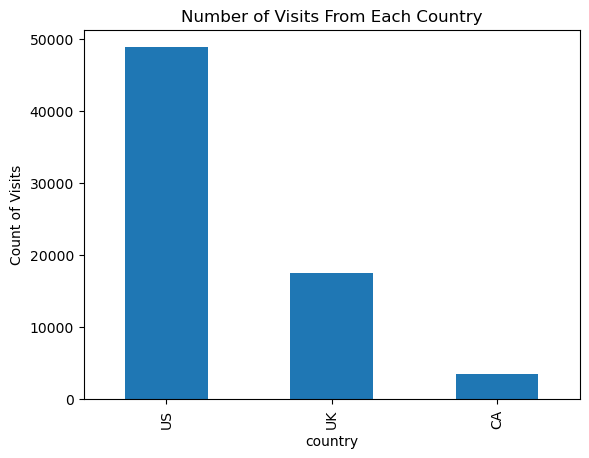

In [8]:
# bar chart of results
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**? 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


#### The 'converted' column is not categorical. It is numeric (an integer).

`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

In [10]:
df['converted'].value_counts()

converted
0    60770
1     9119
Name: count, dtype: int64

#### The possible values are 0 and 1.  It makes sense in an A/B test that the there would only two outcome options.  This is the A vs. B we are analyzing in this project.

<a id='probability'></a>
#### Part II - Probability

Now that you have had a chance to learn more about the dataset, let's look more at how different factors are related to `converting`.

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [11]:
df['converted'].mean()

0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [12]:
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [13]:
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

#### Yes, there is a higher probability of conversion.

`e)` What is the probability that an individual was in the `treatment`?

In [14]:
df['group'].value_counts(normalize=True) # 0.5038 probability in treatment

group
treatment    0.503813
control      0.496187
Name: proportion, dtype: float64

`f)` What is the probability that an individual was from Canada `CA`?

In [15]:
df['country'].value_counts(normalize=True) # 0.0499 probability from Canada

country
US    0.698966
UK    0.251127
CA    0.049908
Name: proportion, dtype: float64

`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [16]:
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [17]:
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

#### The numbers are quite similar for the conversion rates in the US and UK (both round to 0.13) suggesting that the country does not have an effect. The numbers are different, so more analysis is needed to determine whether or not the country influences the conversion rate.

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.  The `US` column is done for you, and two methods for calculating the probabilities are shown - **COMPLETE THE REST OF THE TABLE**.  Does it appear that there could be an interaction between how country and treatment impact conversion?

These two values that are filled in can be written as:

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"control"})) = 10.7\%$

$P(\text{converted} == 1|(\text{country} ==\text{"US" AND }\text{group} ==\text{"treatment"})) = 15.8\%$

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  %          |  %          |
| Treatment   | 15.8%       |  %          |  %          |

In [18]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [19]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

In [20]:
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [21]:
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

##### Solution -- Complete the Table Here

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%      |   9.4%      |
| Treatment   | 15.8%       |  14.9%      |  15.4%      |

<a id='experimentation'></a>
### Part III - Experimentation

Consider you need to make the decision just based on all the data provided.  If you want to assume that the control page is better unless the treatment page proves to be definitely better at a Type I error rate of 5%, you state your null and alternative hypotheses in terms of **$p_{control}$** and **$p_{treatment}$** as:  

$H_{0}: p_{control} >= p_{treatment}$

$H_{1}: p_{control} < p_{treatment}$

Which is equivalent to:

$H_{0}: p_{treatment} - p_{control} <= 0$

$H_{1}: p_{treatment} - p_{control} > 0$


Where  
* **$p_{control}$** is the `converted` rate for the control page
* **$p_{treatment}$** `converted` rate for the treatment page

**Note for this experiment we are not looking at differences associated with country.**

Assume under the null hypothesis, $p_{treatment}$ and $p_{control}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{treatment}$ and $p_{control}$ are equal. Furthermore, assume they are equal to the **converted** rate in `df` regardless of the page. **These are set in the first cell below.**<br><br>

* Use a sample size for each page equal to the ones in `df`. **These are also set below.**  <br><br>

* Perform the sampling distribution for the difference in `converted` between the two pages over 500 iterations of calculating an estimate from the null.  <br><br>

* Use the cells below to provide the necessary parts of this simulation.  

If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 4** in the classroom to make sure you are on the right track.<br><br>

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset.

In [22]:
p_control_treatment_null  = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

In [23]:
p_control_treatment_null

0.13047832992316388

In [24]:
n_treatment

35211

In [25]:
n_control

34678

`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be the same): 

`[0, 0, 1, 1, 0, ....]` 

In [26]:
treatment_converted = np.random.choice([0, 1], 
                                       size=n_treatment, 
                                       p=[1 - p_control_treatment_null, p_control_treatment_null])

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.  It should look something like the following (the 0's and and 1's **don't** need to be exactly the same): 

`[0, 0, 1, 1, 0, ....]` 

In [27]:
control_converted = np.random.choice([0, 1], 
                                     size=n_control, 
                                     p=[1 - p_control_treatment_null, p_control_treatment_null])

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [28]:
# from the simulated values calculated above:

p_treatment = treatment_converted.mean()
p_control = control_converted.mean()
p_diff = p_treatment - p_control
print(p_diff)

-0.001066376591687429


`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.  This array should look similar to the below **(the values will not match AND this will likely take a bit of time to run)**:

`[0.001, -0.003, 0.002, ...]`

In [29]:
p_diffs = []

for _ in range(500):
    # simulate the treatment and control converted arrays
    treatment_converted = np.random.choice([0, 1], 
                                           size=n_treatment, 
                                           p=[1 - p_control_treatment_null, p_control_treatment_null])
    control_converted = np.random.choice([0, 1], 
                                         size=n_control, 
                                         p=[1 - p_control_treatment_null, p_control_treatment_null])    
    # calculate p_treatment and p_control under the null
    p_treatment = treatment_converted.mean()
    p_control = control_converted.mean()
    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_treatment - p_control
    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

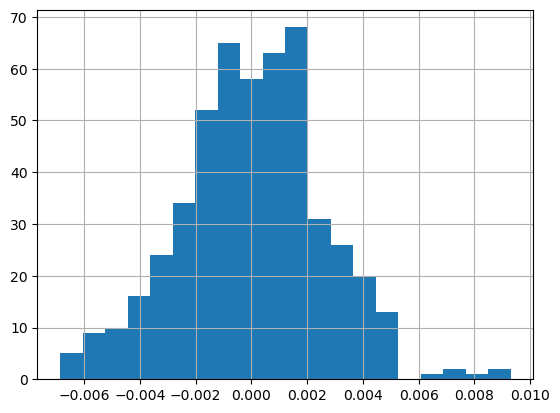

In [30]:
p_diffs = pd.Series(p_diffs);
p_diffs.hist(bins=20);

#### The plot resembles a normal distribution centered at zero as expected.

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [31]:
# observed results from original dataframe

obs_treatment = df.query('group == "treatment"')['converted'].mean()
obs_control = df.query('group == "control"')['converted'].mean()
obs_diff = obs_treatment - obs_control
print(f'Observed difference between treatment and control: {obs_diff:.4f}')

# calculate p-value

p_value = (p_diffs > obs_diff).mean()
print(f'p-value: {p_value}')

Observed difference between treatment and control: 0.0501
p-value: 0.0


`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

#### The p_differences that were greater than the observed difference was calculated.  In scientific studies this value is called the p-value.  The fact that the p-value of 0.0 was below the Type I error rate (alpha) of 0.05 is evidence to reject the Null Hypothesis.  This is solid evidence to suggest that the treatment page results in a higher conversion rate than the control page.